# Red Wine Quality Prediction

## Problem Statement

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

**Features**:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- Alcohol_content

**Labels**: 

- quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Red Wine Quality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
data.shape

(1599, 13)

In [4]:
# Any missing values ?

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [5]:
# Dataframe statistics

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   object 
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


**As we have categorical column (Alcohol_Content), we need to convert into numeric data using encoding method.**

Content is following some order like Low, Med and High. We need to give weight according to the order.

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
oe = OrdinalEncoder(categories = [['Low','Medium','High']])

data['Alcohol_content'] = oe.fit_transform(data[['Alcohol_content']]) 

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


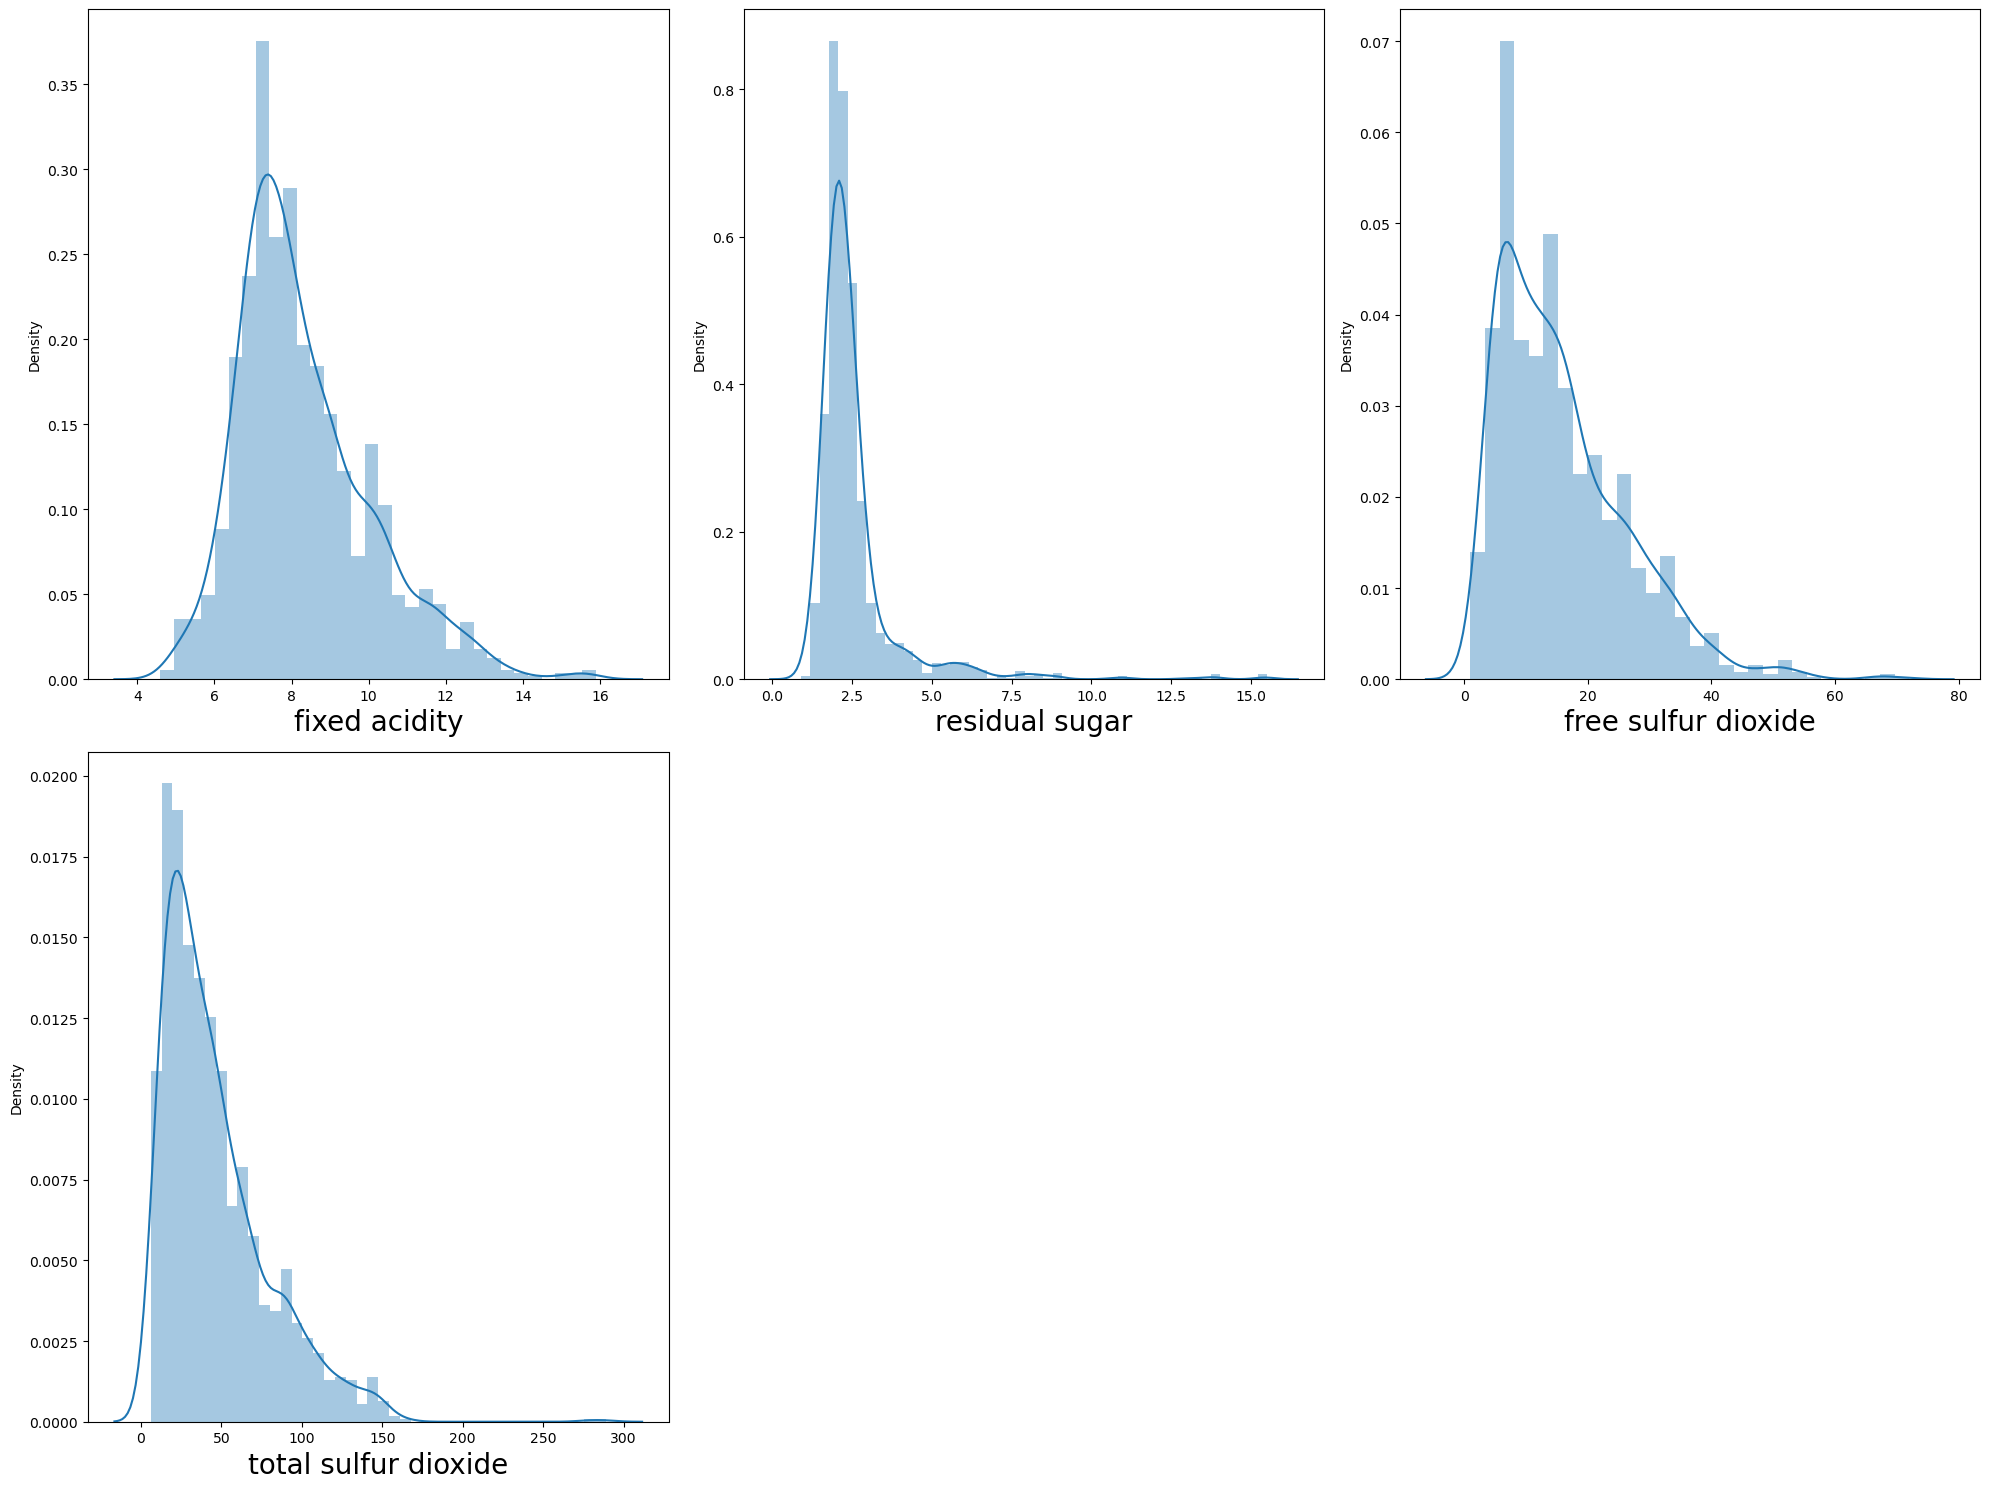

In [10]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide']]:
    if plotnumber <= 4:
        plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

In [11]:
from scipy.stats import zscore

z_score = zscore(data[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide']])

abs_z_score = np.abs(z_score)

data = data[(abs_z_score < 3).all(axis = 1)]

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
count,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.000000,1533.00000,1533.000000,1533.000000,1533.000000,1533.000000
mean,8.281931,0.527590,0.267893,2.379680,0.087055,15.145140,44.446184,0.996674,3.31456,0.657926,10.430952,1.114808,5.638617
std,1.656507,0.177729,0.193705,0.869885,0.047222,9.302782,29.897855,0.001795,0.15282,0.170404,1.058057,0.675858,0.811067
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.74000,0.330000,8.400000,0.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.21000,0.550000,9.500000,1.000000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.31000,0.620000,10.200000,1.000000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,60.000000,0.997800,3.40000,0.730000,11.100000,2.000000,6.000000
max,13.500000,1.580000,1.000000,6.700000,0.611000,47.000000,145.000000,1.002890,4.01000,2.000000,14.000000,2.000000,8.000000


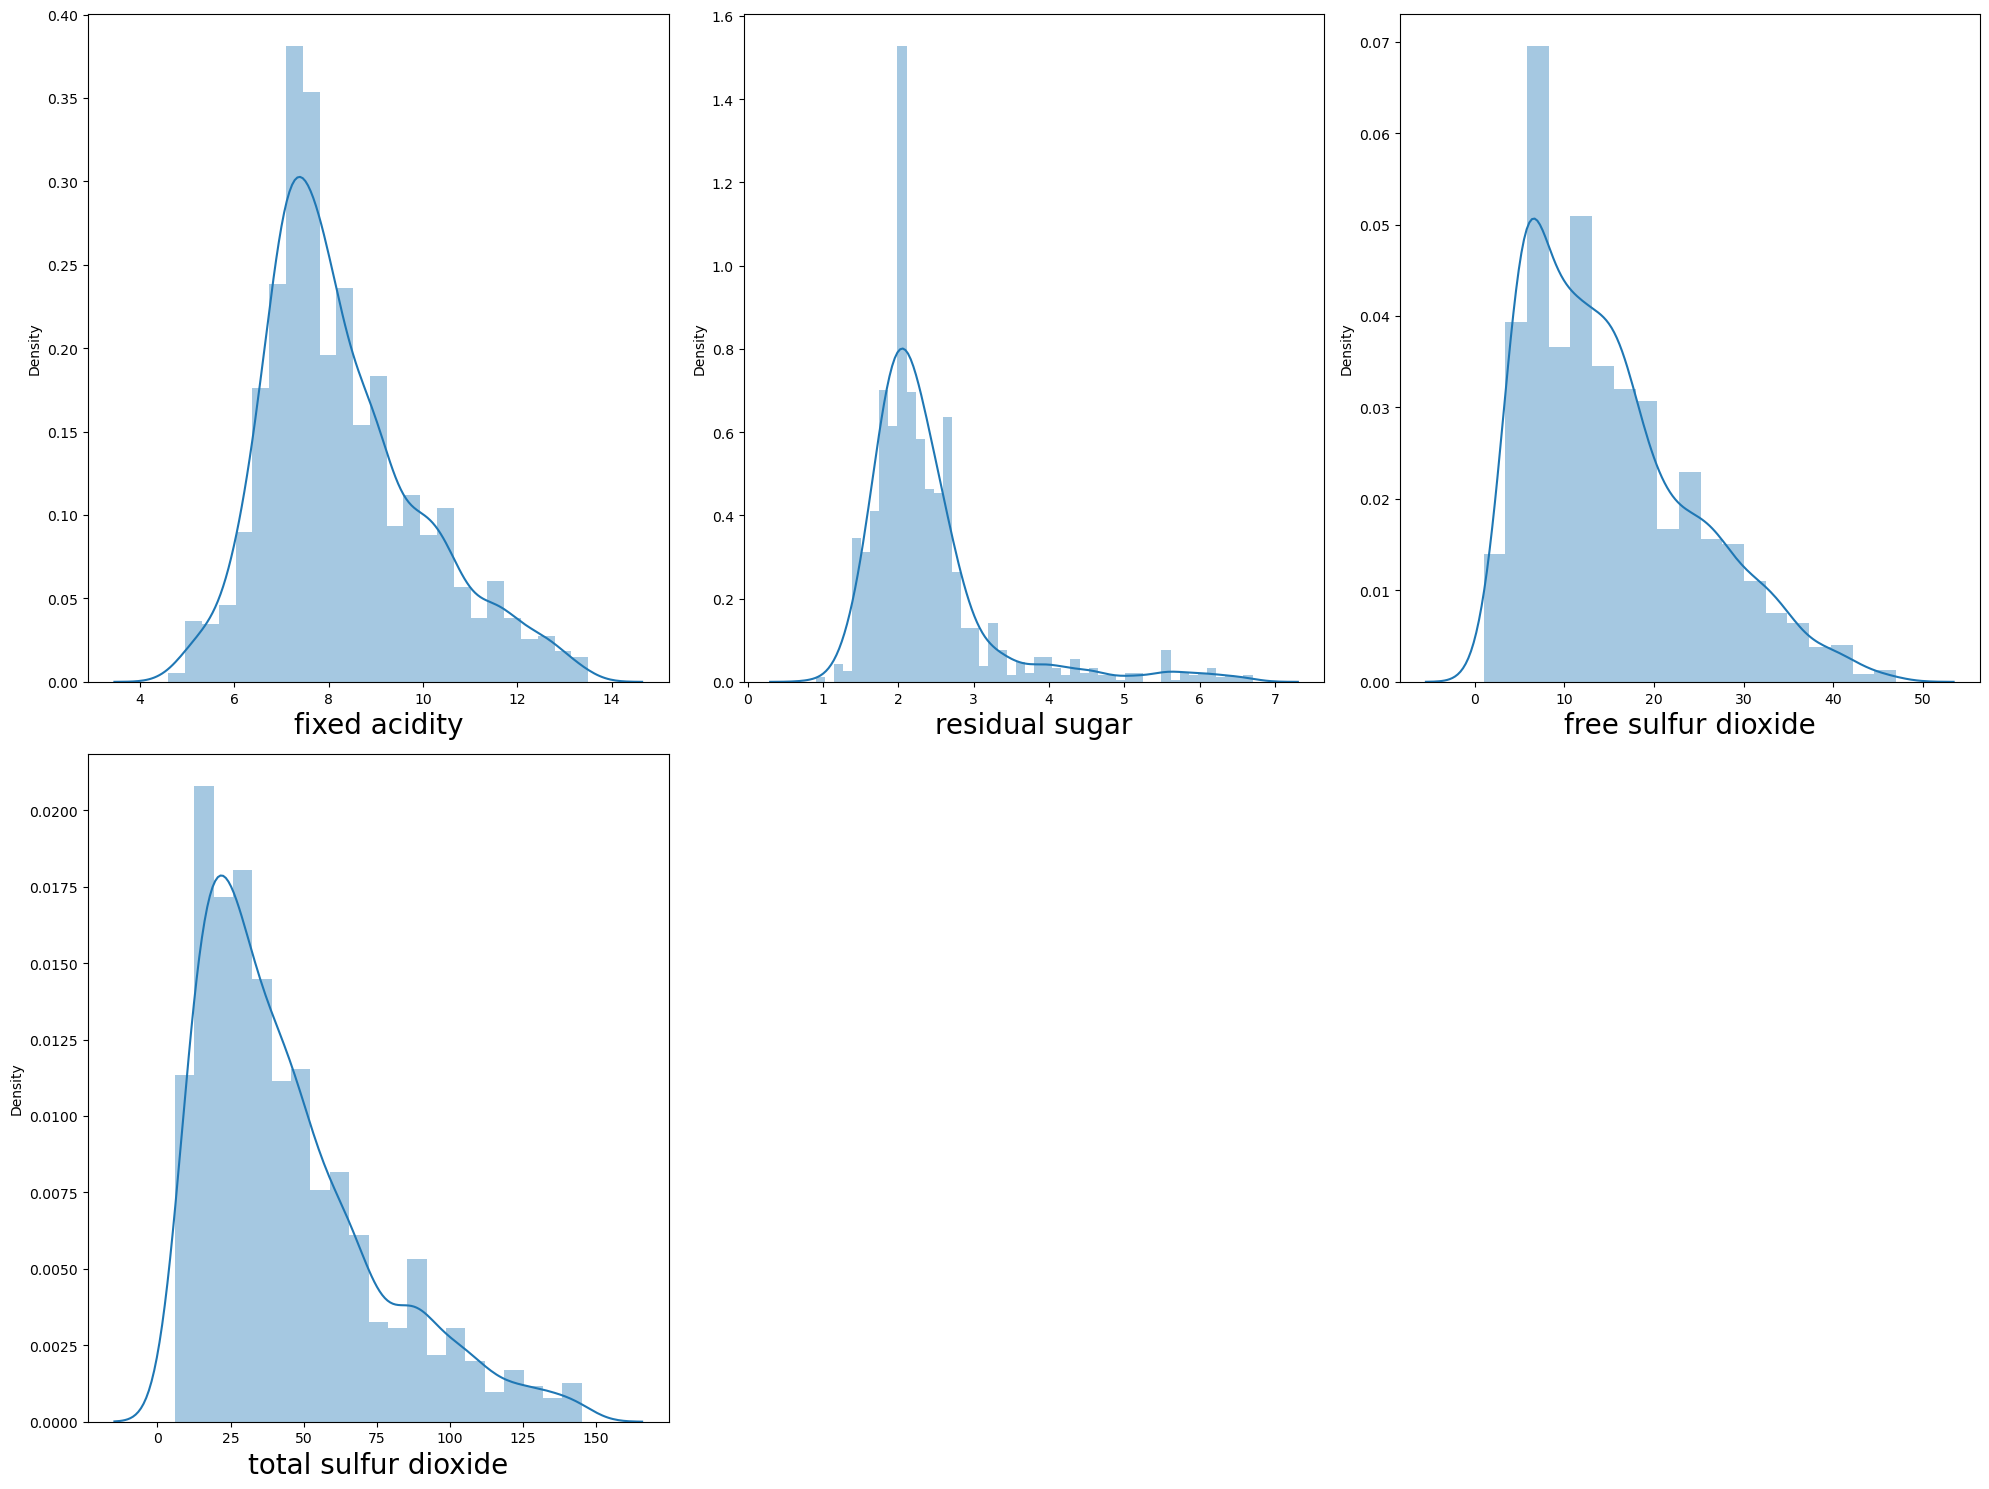

In [12]:
# Check how much skewness we removed

plt.figure(figsize=(20,15))
plotnumber = 1

for column in data[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide']]:
    if plotnumber <= 4:
        plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

### Plotting Heatmap (Correlation matrix)

 - Let's try to see if we can reduce the features using different techniques
 - Let's plot heatmap to visualize and find the coefficient of multicollinearity

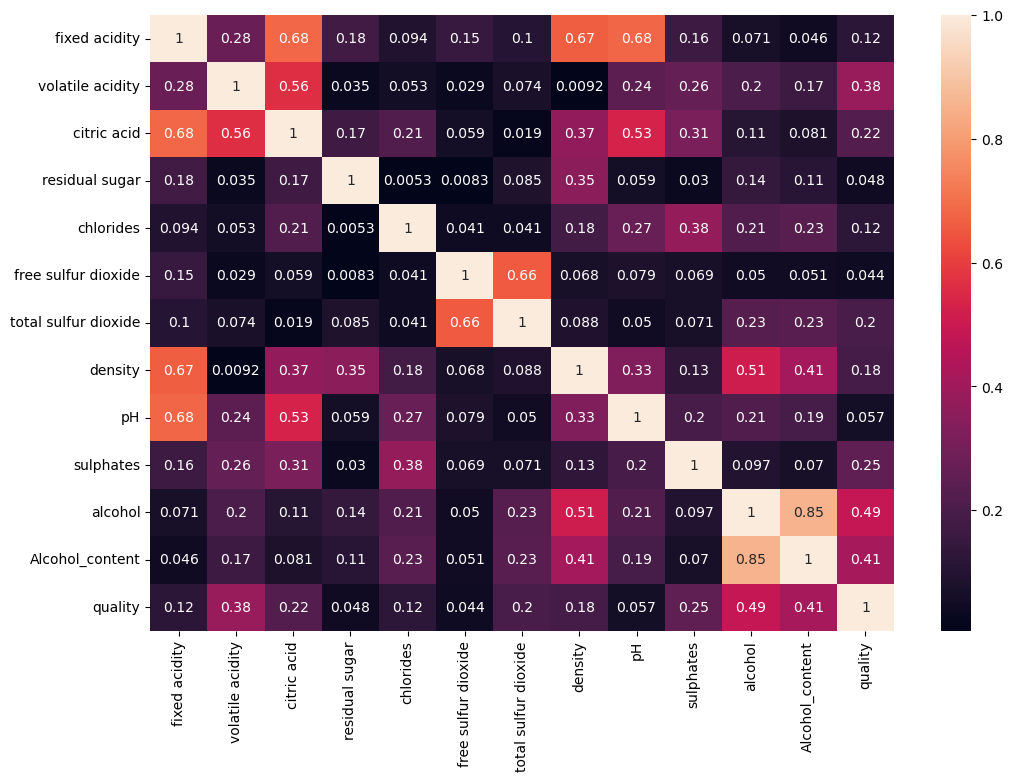

In [13]:
dff_corr = data.corr().abs()  # This will get the coefficient of one variable vs all other variable(Relationship)

plt.figure(figsize =(12,8))
sns.heatmap(dff_corr, annot = True, annot_kws ={'size':10})
plt.show()

Seems like Alcohol_content and alcohol are correlated as per above heat map. But we need more proof.

### Make sure they are really correlated (It should follow some trend)

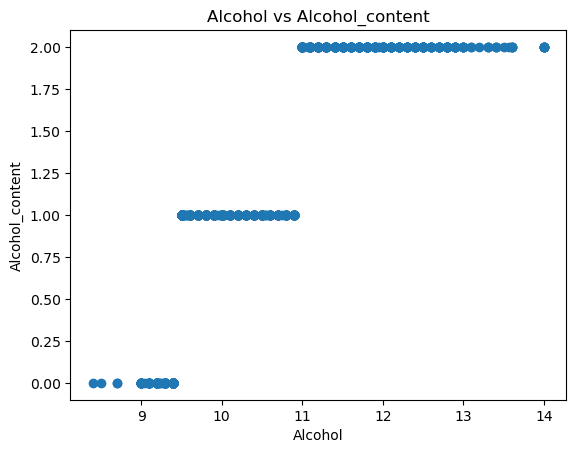

In [14]:
plt.scatter(data.alcohol, data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

We see clear trend. As and when Alcohol level increases its content also increasing. So we can delete one of them.

In [15]:
X = data.drop(columns = ['quality','Alcohol_content'])
y = data.quality

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 41)

In [17]:
def metric_score(clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        train_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        
        print(f"Accuracy Score: {accuracy_score(y_train,train_pred) * 100:.2f}%")
        
    elif train == False:
        test_pred = clf.predict(x_test)
        
        print('\n===============Test Result================')
        print(f"Accuracy Score: {accuracy_score(y_test,test_pred) * 100: .2f}%")
        
        print('\n \n test Classification report \n', classification_report(y_test, test_pred,digits = 2))

In [18]:
# Model initiation

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
# Call the function and pass dataset to check train and test score

metric_score(clf,x_train,x_test,y_train,y_test,train = True)  # This is for training score

metric_score(clf,x_train,x_test,y_train,y_test,train = False) # This is for testing score


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result================
Accuracy Score:  60.68%

 
 test Classification report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.65      0.75      0.69       144
           6       0.68      0.59      0.63       161
           7       0.48      0.54      0.50        54
           8       0.12      0.33      0.18         3

    accuracy                           0.61       384
   macro avg       0.32      0.37      0.34       384
weighted avg       0.59      0.61      0.60       384



### Hyperparameter Tuning

In [20]:
# We are tuning four Important hyperparameters right now, we are passing the different values for both parameters

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10) 
}

In [21]:
grid_search = GridSearchCV(estimator = clf,
                           param_grid = grid_param,
                           cv = 5,
                           n_jobs = -1)

In [22]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [23]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


If we don't get the best accuracy from above best_params_ then we have to tweak the value by adding/ substracting 1 or 2 from the given params

Ex - in above max_depth = 10 (from above) so if the accuracy did not improve then we will choose more 11,12 or less 9,8 and we do the same with all parameters. 

In [24]:
# Initiate DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion= 'gini', min_samples_split= 3, max_depth= 13, min_samples_leaf = 2)

# Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=3)

In [25]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)  # training score

metric_score(clf,x_train,x_test,y_train,y_test,train = False)  # testing score


===============Train Result===============
Accuracy Score: 88.60%

===============Test Result================
Accuracy Score:  59.90%

 
 test Classification report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.63      0.76      0.69       144
           6       0.67      0.58      0.62       161
           7       0.54      0.52      0.53        54
           8       0.00      0.00      0.00         3

    accuracy                           0.60       384
   macro avg       0.31      0.31      0.31       384
weighted avg       0.59      0.60      0.59       384



## Our Model score approximately 88% on training data and 60% on testing data.